# Análise de agrupamento

#### Exemplo 1.
Utilizar o algoritmo complete linkage para agrupar clientes de um shopping center

In [26]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.cluster.hierarchy as shc

from sklearn.cluster import AgglomerativeClustering
plt.rcParams['figure.figsize'] = (25, 20)

In [27]:
#load dataset
df = pd.read_csv('https://raw.githubusercontent.com/higoramario/univesp-com360-mineracao-dados/main/shopping-data.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [28]:
#select features to clustering
df2 = df[['Annual Income (k$)', 'Spending Score (1-100)']]
df2.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


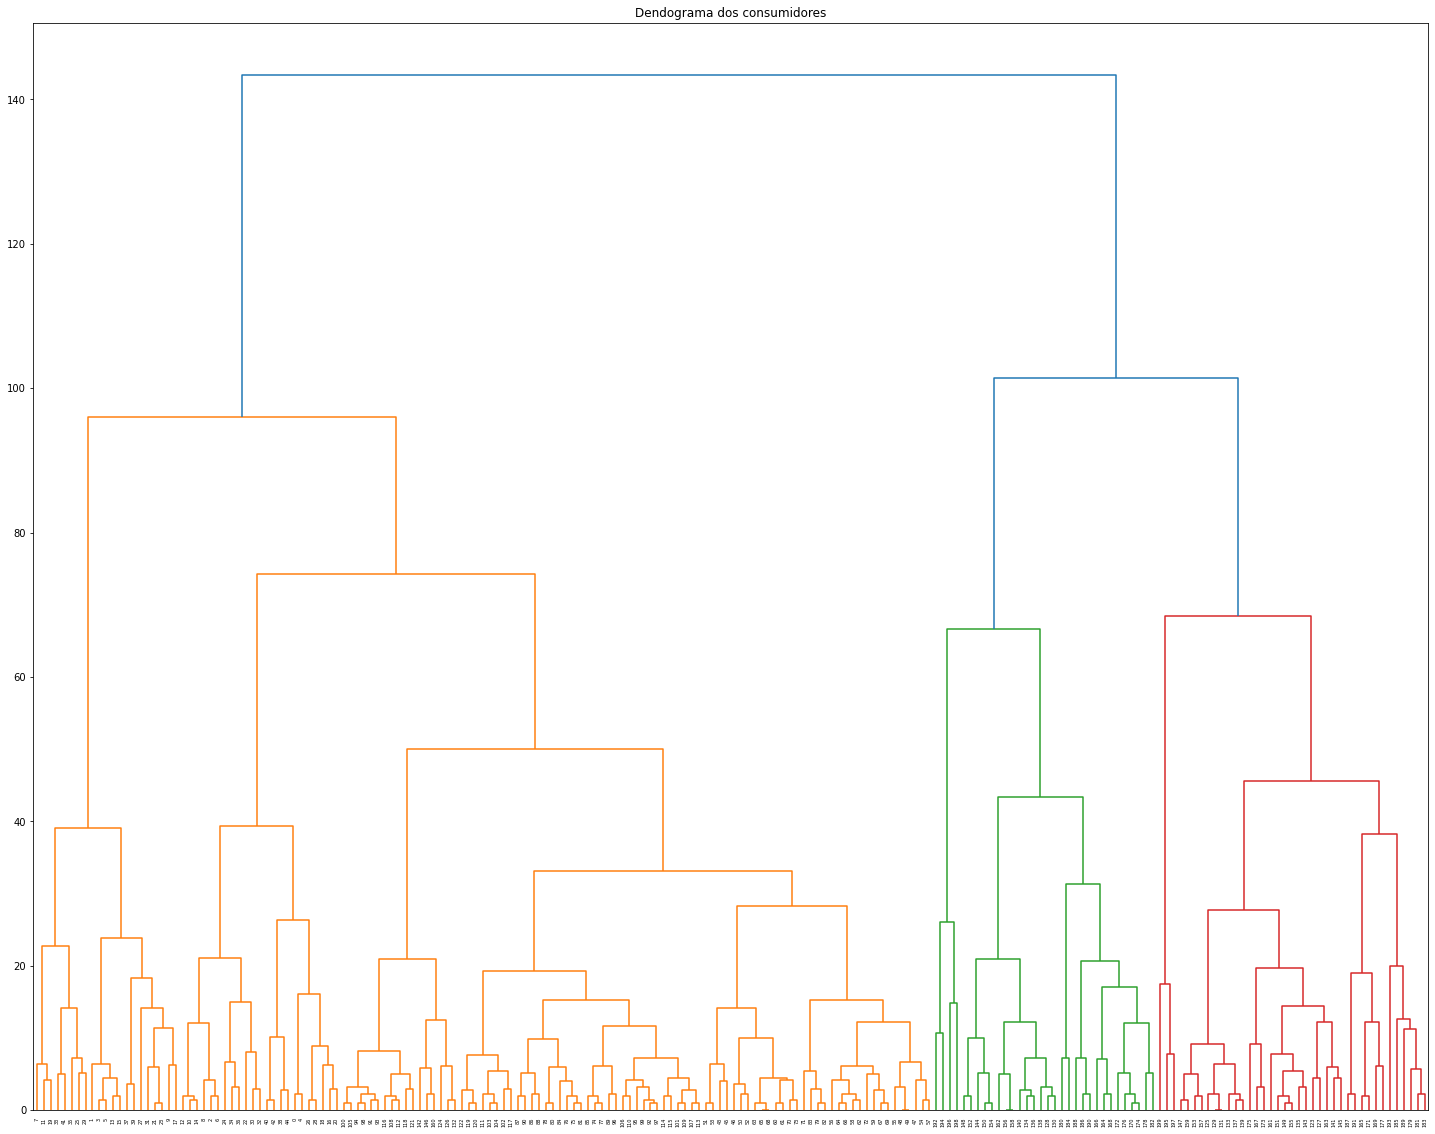

In [29]:
plt.title('Dendograma dos consumidores')
dendograma = shc.dendrogram(shc.linkage(df2, method='complete'))

In [30]:
#clustering
n_grupos = 5
grupos = AgglomerativeClustering(n_clusters=n_grupos, affinity='euclidean', linkage='complete')
grupos.fit_predict(df2)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 2, 0, 2, 0,
       1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0])

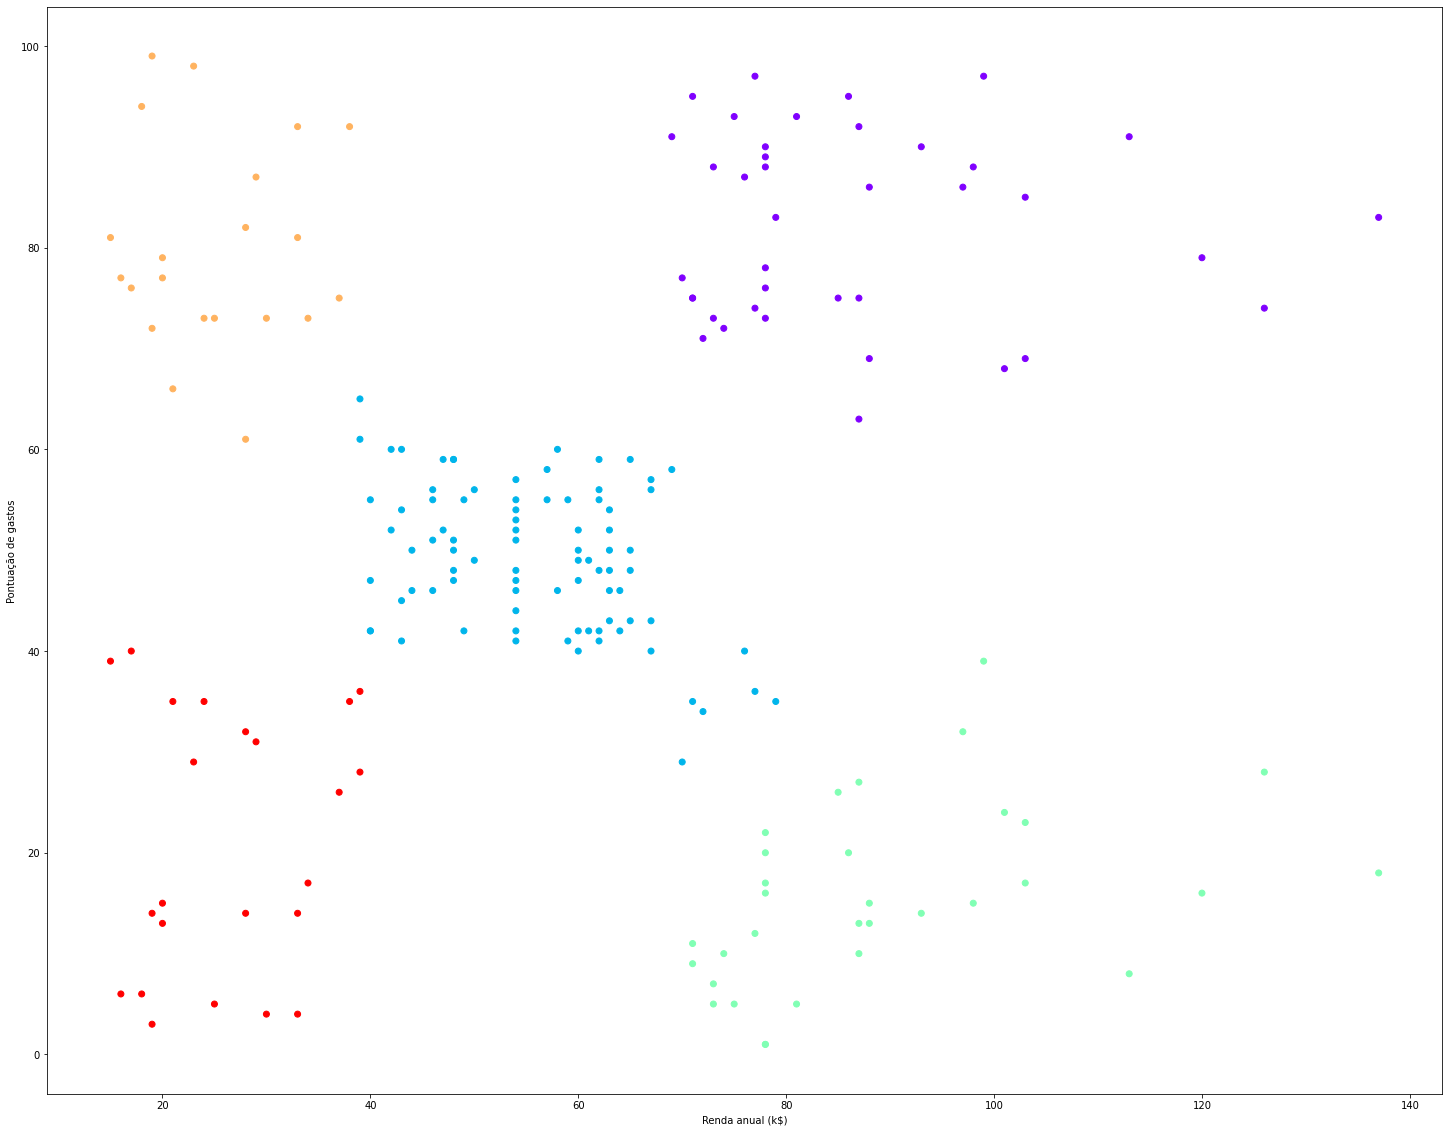

In [31]:
#visualization
plt.scatter(df2['Annual Income (k$)'], df2['Spending Score (1-100)'], c=grupos.labels_, cmap='rainbow')
plt.xlabel('Renda anual (k$)')
plt.ylabel('Pontuação de gastos');

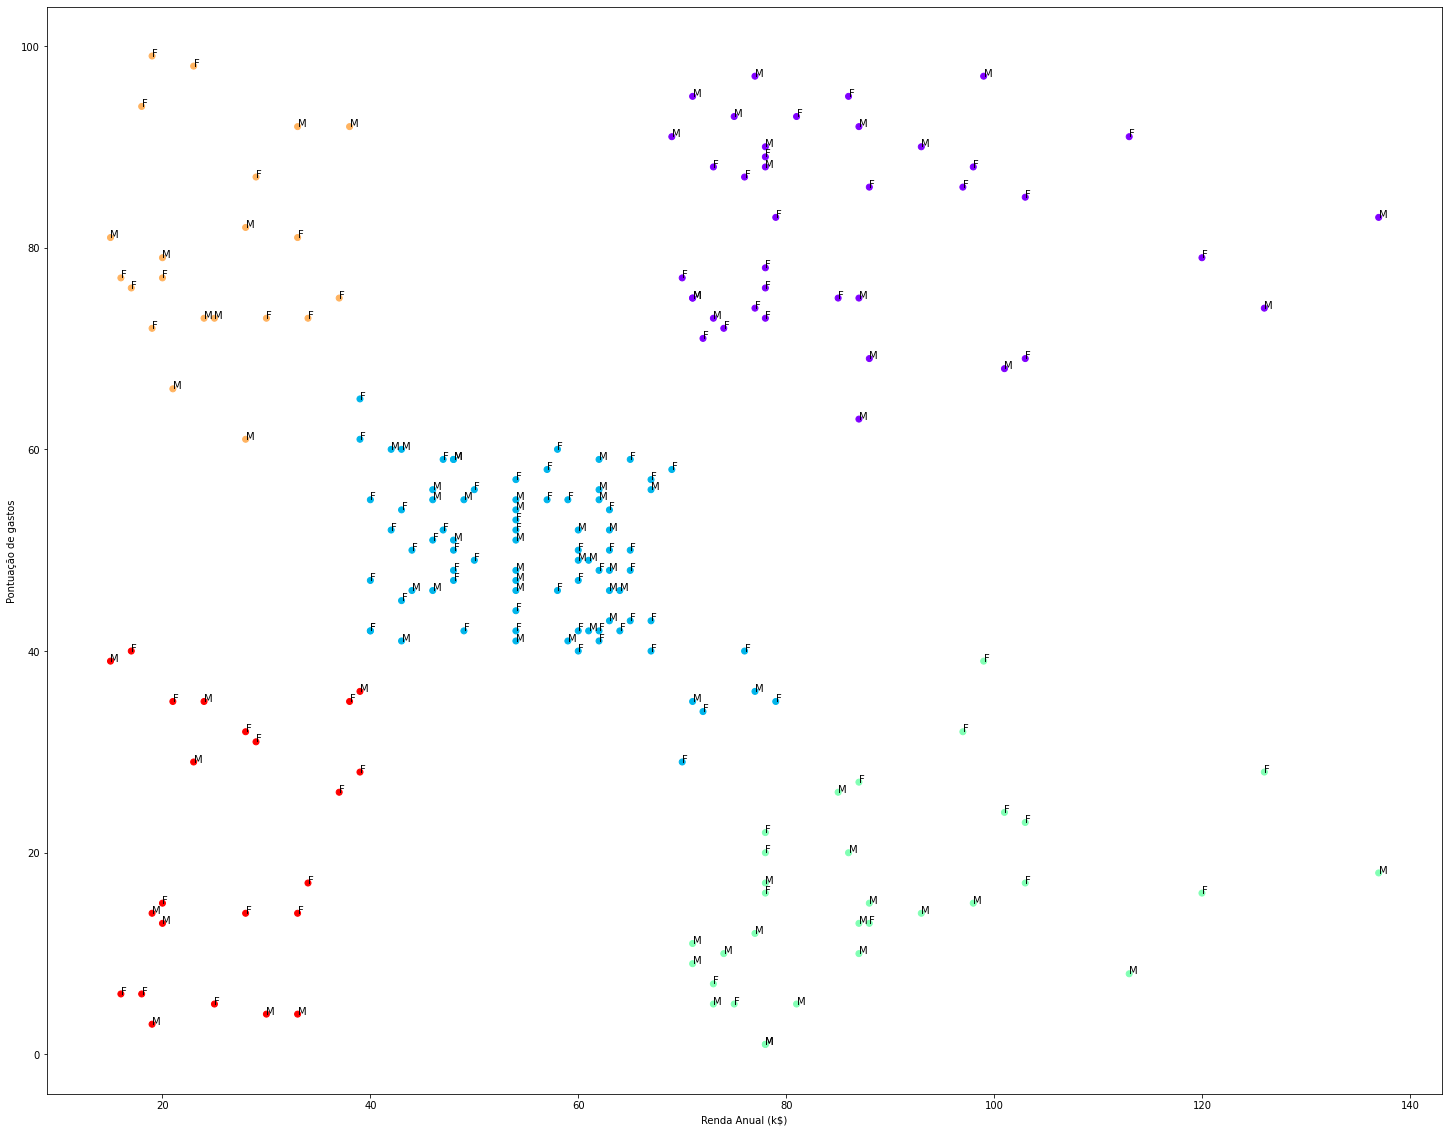

In [35]:
#second analysis
fig, eixo = plt.subplots()

plt.scatter(df2['Annual Income (k$)'], df2['Spending Score (1-100)'], c=grupos.labels_, cmap='rainbow')
eixo.set_xlabel('Renda Anual (k$)')
eixo.set_ylabel('Pontuação de gastos')

#iterar sobre o df original classificando os objetos a partir do genero
for i, texto in enumerate(df['Genre']):
    if texto == 'Female':
        eixo.annotate('F', (df.iloc[i]['Annual Income (k$)'], df.iloc[i]['Spending Score (1-100)']))
    else:
        eixo.annotate('M', (df.iloc[i]['Annual Income (k$)'], df.iloc[i]['Spending Score (1-100)']))

#### Exemplo 2.
Use o algoritmo complete-linkage para analisar um conjunto de dados socioeconômicos de países. Para fazer a análise, selecione os atributos child_mort e life_expec usando 4 grupos, e, como a medida de similaridade, use a distância euclidiana, Gere o dendograma e o gráfico de dispersão dos dados.

Quais são os países que têm as piores taxas de mortalidade e expectativa de vida? Os que têm as melhores taxas? (Inclua os nomes dos países nos gráficos)

In [36]:
df3 = pd.read_csv('https://raw.githubusercontent.com/higoramario/univesp-com360-mineracao-dados/main/country-data.csv')
df3.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [38]:
df4 = df3[['child_mort', 'life_expec']]
df4.head()

,child_mort,life_expec
0,90.2,56.2
1,16.6,76.3
2,27.3,76.5
3,119.0,60.1
4,10.3,76.8


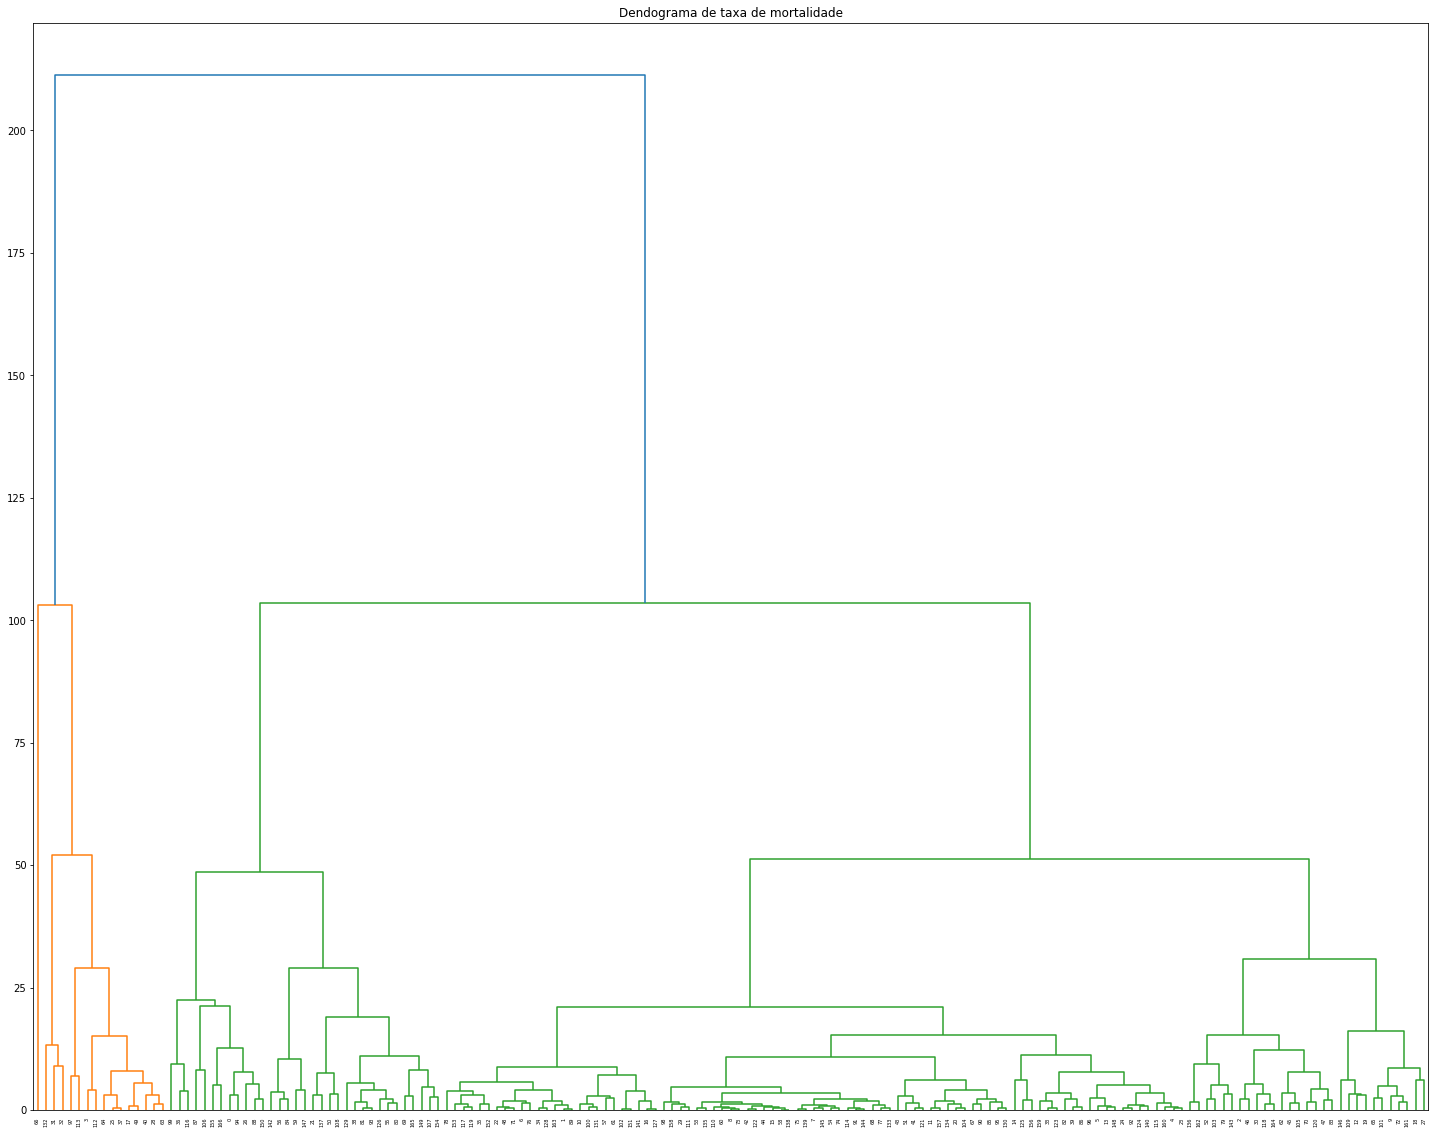

In [41]:
#dendrogram
plt.title('Dendograma de taxa de mortalidade')
dendograma = shc.dendrogram(shc.linkage(df4, method='complete'))

In [42]:
#clustering
n_grupos = 4
grupos = AgglomerativeClustering(n_clusters=n_grupos, affinity='euclidean', linkage='complete')
grupos.fit_predict(df4)

array([2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2,
       1, 1, 1, 0, 2, 1, 0, 1, 1, 0, 0, 1, 1, 1, 2, 0, 2, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 0, 0, 1,
       3, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2,
       2, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1,
       1, 1, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1,
       0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2])

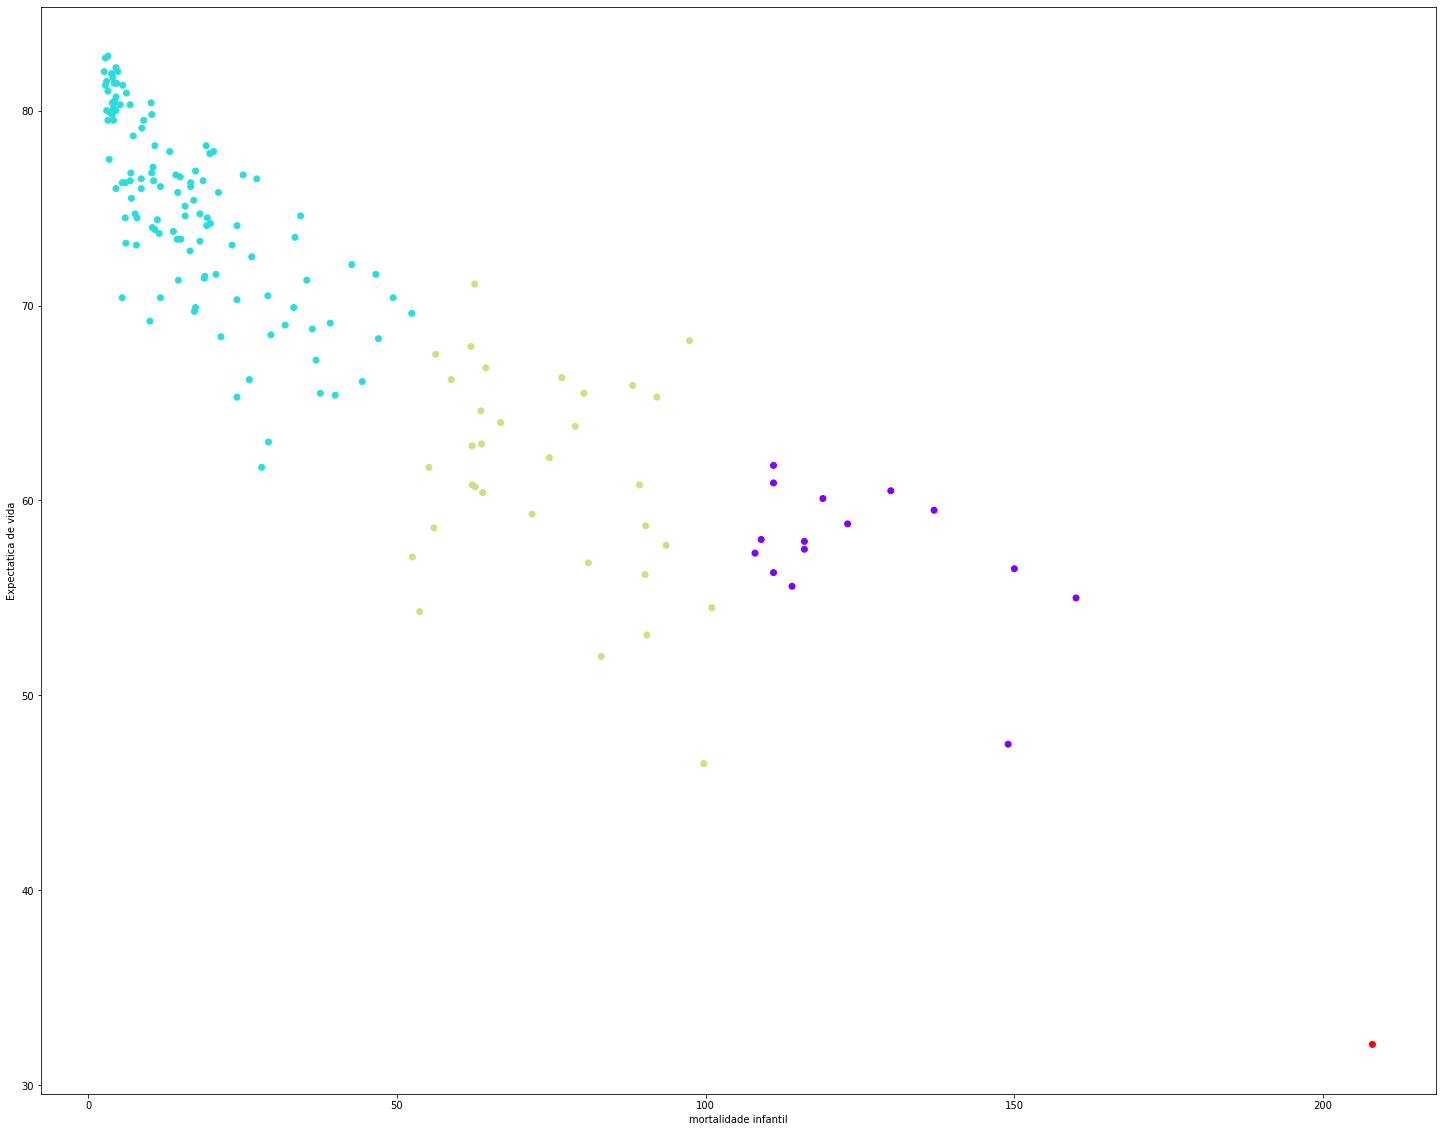

In [47]:
#visualization
plt.scatter(df4['child_mort'], df4['life_expec'], c=grupos.labels_, cmap='rainbow')
plt.xlabel('mortalidade infantil')
plt.ylabel('Expectatica de vida');

In [51]:
#pior taxa de mortalidade
df3['country'][df3['child_mort'] > 200]

66    Haiti
Name: country, dtype: object

In [53]:
#pior expectativa de vida
df3['country'][df3['life_expec'] <  35]

66    Haiti
Name: country, dtype: object

In [56]:
#melhor taxa de mortalidade
df3['country'][df3['child_mort'] < 3]

68        Iceland
91     Luxembourg
133     Singapore
Name: country, dtype: object

In [61]:
#melhor expectativa de vida
df3['country'][df3['life_expec'] > 82]

77           Japan
133      Singapore
145    Switzerland
Name: country, dtype: object

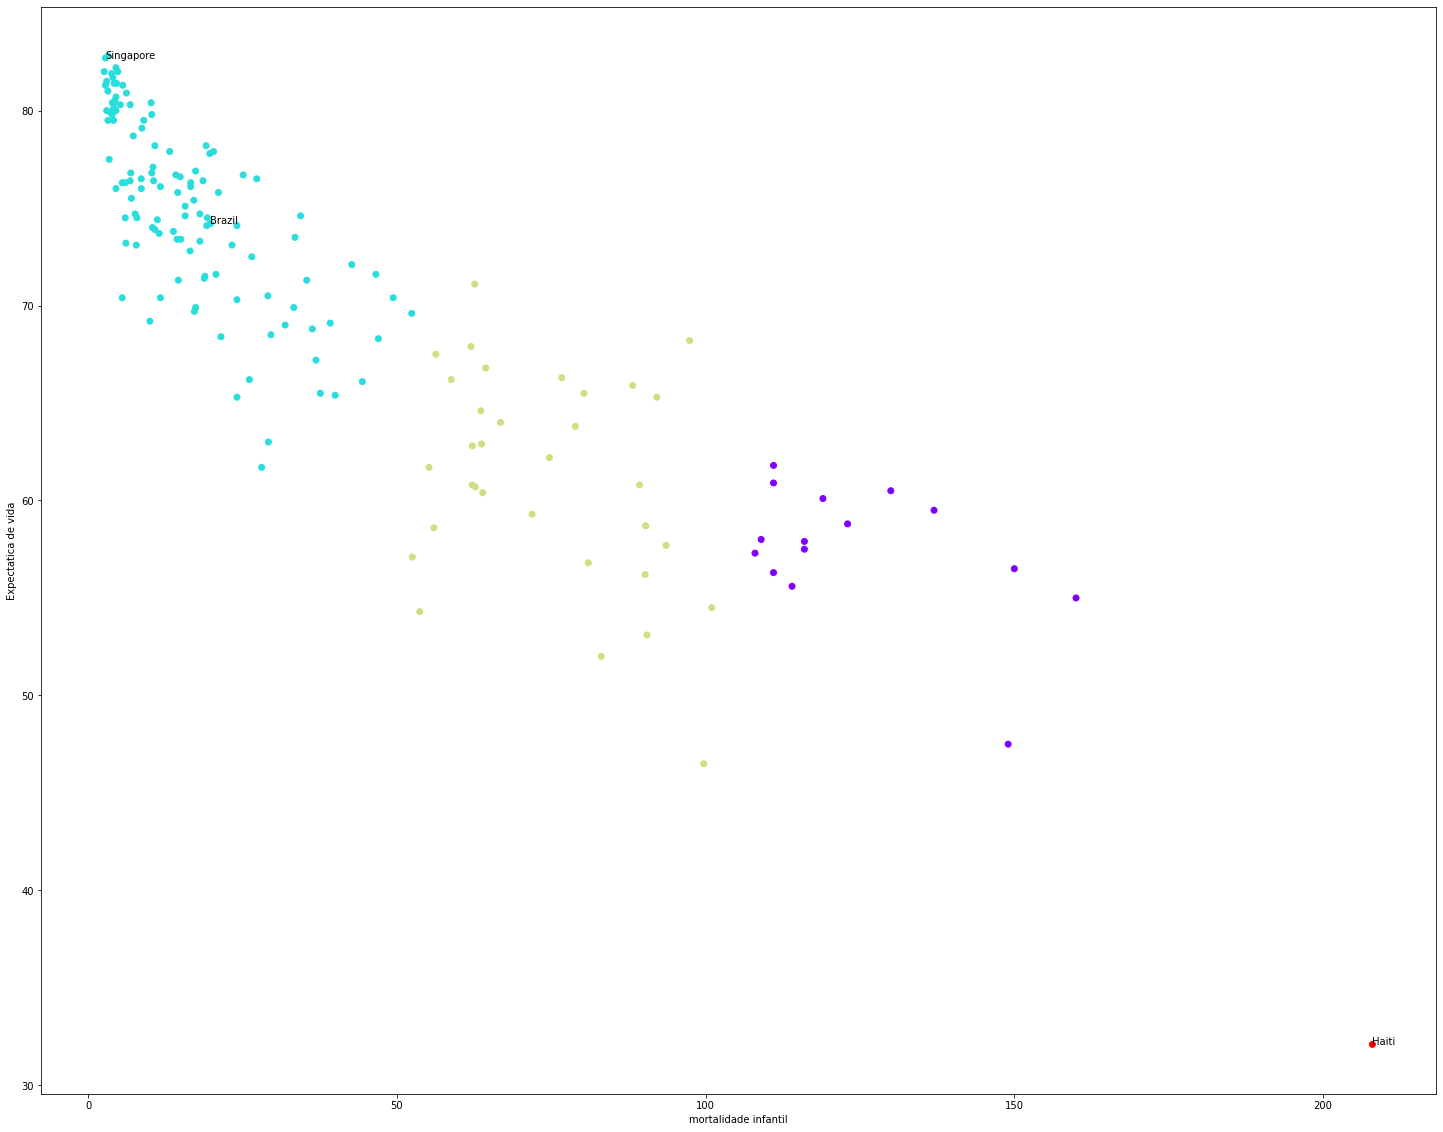

In [65]:
#adicionar rotulos ao gráfico de dispersão
fig, eixo = plt.subplots()

plt.scatter(df4['child_mort'], df4['life_expec'], c=grupos.labels_, cmap='rainbow')
plt.xlabel('mortalidade infantil')
plt.ylabel('Expectatica de vida');

#iterar sobre o df original que tem o nome dos países
for i, texto in enumerate(df3['country']):
    #selecionar os piores e melhores casos para melhor visualização
    if ((df3.iloc[i]['child_mort'] > 200 and df3.iloc[i]['life_expec'] < 35)
        or (df3.iloc[i]['child_mort'] < 3 and df3.iloc[i]['life_expec'] > 82)
        or (df3.iloc[i]['country'] == 'Brazil')):
        eixo.annotate(texto, (df3.iloc[i]['child_mort'], df3.iloc[i]['life_expec']))

plt.show()